In [1]:
# Install first if needed: pip install yfinance matplotlib pandas numpy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Select tickers and timeframe
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
start_date = '2022-01-01'
end_date = '2024-12-31'

# Step 2: Download historical price data
price_data = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
# Step 3: Compute factor exposures

# 12M Return (Momentum)
returns_12m = price_data.pct_change(252).iloc[-1]

# Volatility (annualized std of daily returns)
volatility = price_data.pct_change().rolling(window=21).std().iloc[-1] * np.sqrt(252)

# Mock PE ratios and Market Cap (yfinance doesn't directly provide these)
mock_pe = {
    'AAPL': 28.4,
    'MSFT': 33.2,
    'GOOGL': 26.5,
    'AMZN': 74.3,
    'META': 22.1
}
mock_market_cap = {
    'AAPL': 2.9e12,
    'MSFT': 2.7e12,
    'GOOGL': 1.7e12,
    'AMZN': 1.5e12,
    'META': 1.2e12
}

In [6]:
# Step 4: Combine into factor dataframe
factor_df = pd.DataFrame({
    '12M_Return': returns_12m,
    'Volatility': volatility,
    'PE': pd.Series(mock_pe),
    'MarketCap': pd.Series(mock_market_cap)
})

print("\n📊 Factor Exposure Data:")
print(factor_df)


📊 Factor Exposure Data:
       12M_Return  Volatility    PE     MarketCap
AAPL     0.309203    0.160691  28.4  2.900000e+12
AMZN     0.442822    0.274824  74.3  1.500000e+12
GOOGL    0.368703    0.356995  26.5  1.700000e+12
META     0.656336    0.293181  22.1  1.200000e+12
MSFT     0.140500    0.196119  33.2  2.700000e+12


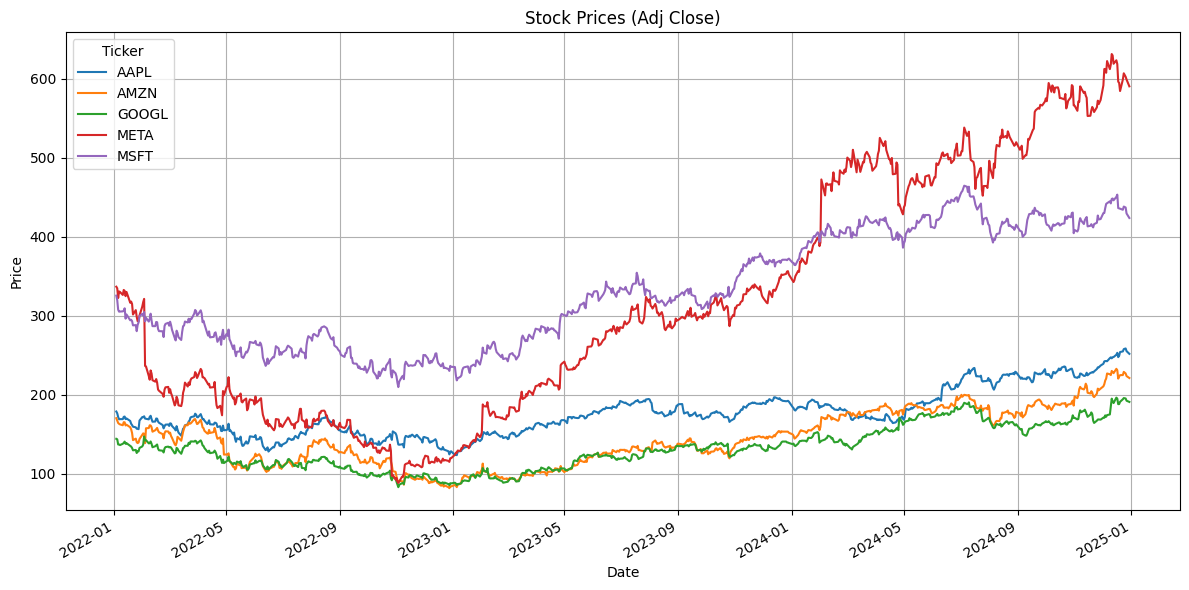

In [7]:
# Step 5: Plot price chart
price_data.plot(figsize=(12, 6), title='Stock Prices (Adj Close)')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

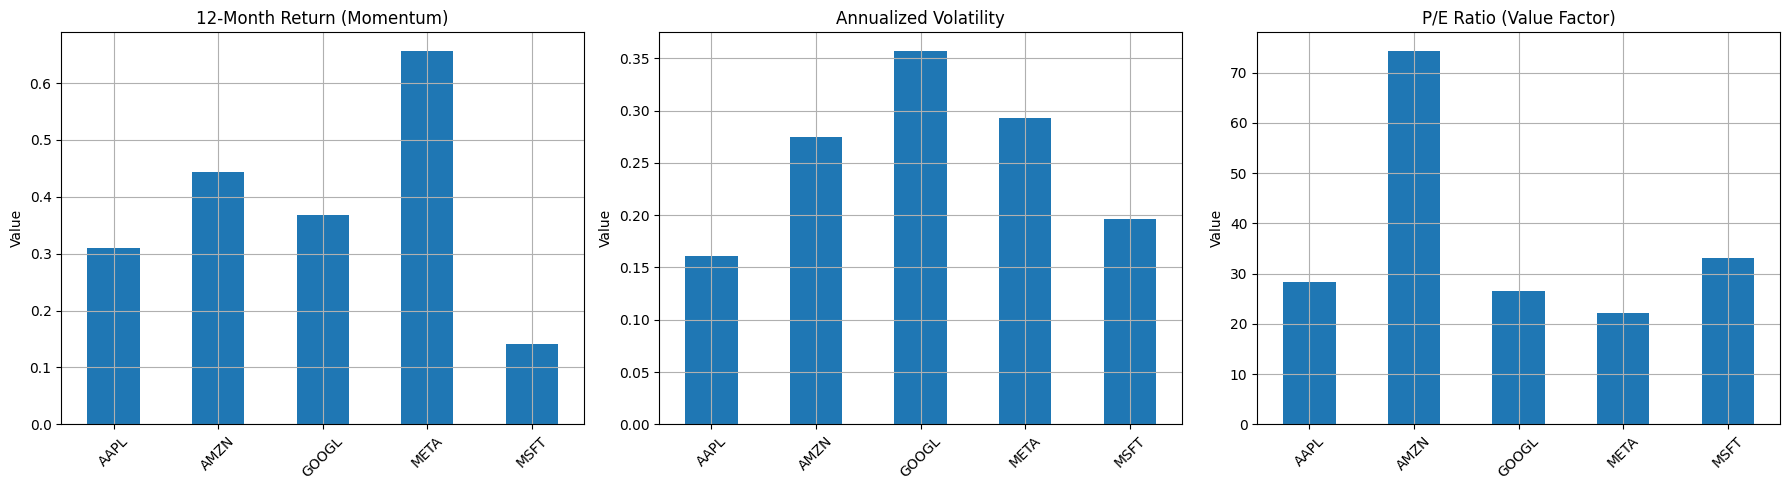

In [8]:
# Step 6: Plot factor exposures
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

factor_df['12M_Return'].plot(kind='bar', ax=axs[0], title='12-Month Return (Momentum)')
factor_df['Volatility'].plot(kind='bar', ax=axs[1], title='Annualized Volatility')
factor_df['PE'].plot(kind='bar', ax=axs[2], title='P/E Ratio (Value Factor)')

for ax in axs:
    ax.grid(True)
    ax.set_ylabel("Value")
    ax.set_xticklabels(factor_df.index, rotation=45)

plt.tight_layout()
plt.show()